In [1]:
import pandas as pd
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
print(torch.version.cuda)


11.8


In [4]:
df=pd.read_csv('Battery_Data_Cleaned.csv')

In [5]:
len(df['battery_id'].value_counts())

34

In [6]:
df[df['battery_id']==50] 

,type,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
4316,-1,4,50,0,4319,04319.csv,0.622266,0.073173,0.101493
4317,0,24,50,1,4320,04320.csv,0.622266,0.081193,0.192637
4318,1,4,50,2,4321,04321.csv,0.622266,0.081193,0.192637
4319,0,24,50,3,4322,04322.csv,0.622266,0.073414,0.152767
4320,-1,4,50,4,4323,04323.csv,0.974103,0.073414,0.152767
4321,1,4,50,5,4324,04324.csv,0.974103,0.073414,0.152767
4322,-1,4,50,6,4325,04325.csv,0.956141,0.073414,0.152767
4323,1,4,50,7,4326,04326.csv,0.956141,0.073414,0.152767
4324,-1,4,50,8,4327,04327.csv,0.936782,0.073414,0.152767
4325,1,4,50,9,4328,04328.csv,0.936782,0.073414,0.152767


In [7]:
df.describe()

,type,ambient_temperature,battery_id,test_id,uid,Capacity,Re,Rct
count,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000,7368.000000
mean,0.002443,19.911238,32.213762,166.309718,3735.133415,0.824926,0.077739,0.125128
std,0.865297,11.210718,16.643714,139.771878,2190.232696,0.250283,0.022584,0.044834
min,-1.000000,4.000000,5.000000,0.000000,1.000000,0.000000,0.026691,0.038781
25%,-1.000000,4.000000,18.000000,54.000000,1842.750000,0.775098,0.060875,0.084685
50%,0.000000,24.000000,36.000000,125.000000,3686.500000,0.894803,0.074693,0.118383
75%,1.000000,24.000000,45.000000,244.250000,5603.250000,0.986519,0.095817,0.158926
max,1.000000,44.000000,56.000000,555.000000,7565.000000,1.292025,0.142128,0.238124


# Creation of RUL target values

In [8]:
import pandas as pd

df = df.reset_index()

# Assign RUL for each battery
for battery in df['battery_id'].unique():
    # fiter 'battery_id'
    group = df[df['battery_id'] == battery]
    
    # Calculate RUL for each battery id (assigning values from 1 to 0, linealy)
    group['RUL'] = 1 - (group.index - group.index.min()) / (group.index.max() - group.index.min())

    # update values in the original dataframe
    df.loc[group.index, 'RUL'] = group['RUL']



/tmp/ipykernel_2230/829729603.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['RUL'] = 1 - (group.index - group.index.min()) / (group.index.max() - group.index.min())
/tmp/ipykernel_2230/829729603.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['RUL'] = 1 - (group.index - group.index.min()) / (group.index.max() - group.index.min())
/tmp/ipykernel_2230/829729603.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [9]:
df.head()

,index,type,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct,RUL
0,0,-1,4,47,0,1,00001.csv,0.983689,0.054543,0.183130,1.000000
1,1,0,24,47,1,2,00002.csv,0.983689,0.054543,0.183130,0.994536
2,2,1,4,47,2,3,00003.csv,0.983689,0.054543,0.183130,0.989071
3,3,0,24,47,3,4,00004.csv,0.983689,0.051825,0.152493,0.983607
4,4,-1,4,47,4,5,00005.csv,0.925990,0.051825,0.152493,0.978142


In [10]:
df.isnull().sum()

index                  0
type                   0
ambient_temperature    0
battery_id             0
test_id                0
uid                    0
filename               0
Capacity               0
Re                     0
Rct                    0
RUL                    0
dtype: int64

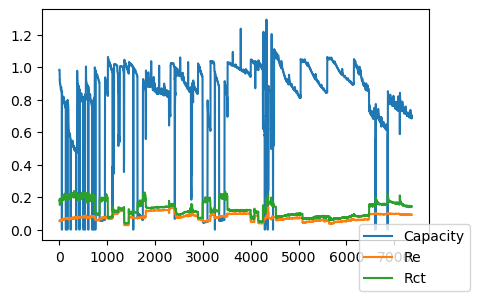

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
for each in df.drop(['RUL','index','type','battery_id','test_id','uid', 'filename', 'ambient_temperature'], axis=1):
    plt.plot(df[each], label=each)
plt.legend(loc="best",bbox_to_anchor=(0.8,0.1))

### Capacity for battery_id = 50

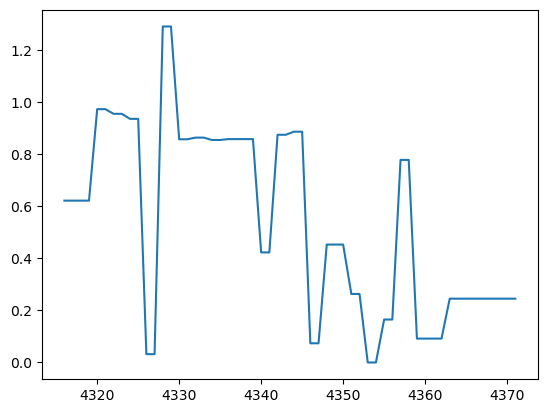

In [12]:
plt.plot(df['Capacity'][4316:4372])

In [13]:
# plt.figure(figsize=(5,3))
# for each in df:
#      plt.plot(df[each], label=each)
# plt.legend(loc="best",bbox_to_anchor=(0.8,0.1))

In [14]:
# import seaborn as sns
# columns=df.columns

# plt.figure(figsize=(17,15))
# for i, col in enumerate(columns,1):
#     plt.subplot(5,3, i)
#     sns.histplot(df[col], kde=True)
#     plt.title(f'{col} distribution')
# # plt.tight_layout()
# plt.show()

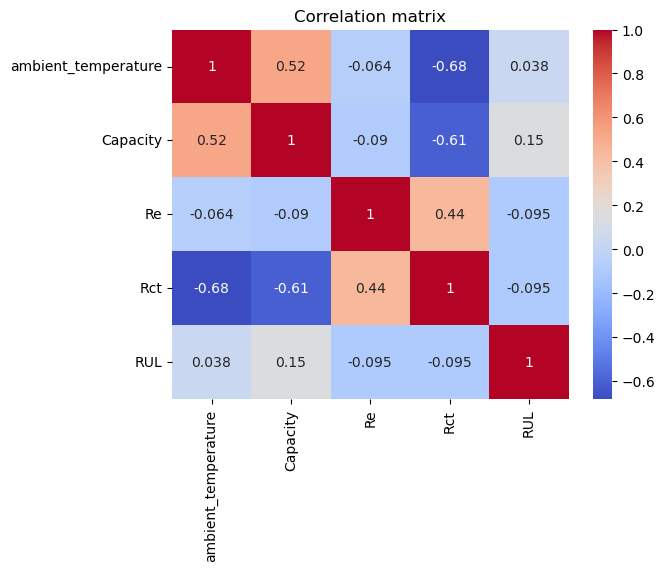

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
df=df.drop(['index','uid','filename','battery_id','test_id','type'], axis=1)
# Filter only numeric values
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# correlation matrix
correlation = df_numeric.corr()

#print(correlation)

sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.title('Correlation matrix')
plt.show()


# Removing outliers

In [16]:
import pandas as pd
# Analize each column


for each in df.columns:
    data = df[each]  
    
    # Calculate IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # limits
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outlier indices
    outliers_index = data[(data < lower_bound) | (data > upper_bound)].index
    #to delete outliers
    # df_cleaned = df_cleaned[(df_cleaned[each] >= lower_bound) & (df_cleaned[each] <= upper_bound)]

    # Show details
    print(f"Column: {each}")
    print(f"Number of outliers: {len(outliers_index)}")
    
    # Analyze if the outliers are associated with 'fail'
    outliers_fail = df.loc[outliers_index, 'RUL']
    print("'fail' outliers distribution:")
    print(outliers_fail.value_counts())
    print("-" * 40)


Column: ambient_temperature
Number of outliers: 0
'fail' outliers distribution:
Series([], Name: count, dtype: int64)
----------------------------------------
Column: Capacity
Number of outliers: 582
'fail' outliers distribution:
RUL
0.726776    4
0.000000    4
0.721311    4
1.000000    4
0.103825    4
           ..
0.956790    1
0.950617    1
0.944444    1
0.938272    1
0.017857    1
Name: count, Length: 317, dtype: int64
----------------------------------------
Column: Re
Number of outliers: 0
'fail' outliers distribution:
Series([], Name: count, dtype: int64)
----------------------------------------
Column: Rct
Number of outliers: 0
'fail' outliers distribution:
Series([], Name: count, dtype: int64)
----------------------------------------
Column: RUL
Number of outliers: 0
'fail' outliers distribution:
Series([], Name: count, dtype: int64)
----------------------------------------


In [17]:

df = df.copy()

columns_to_process = ['Capacity']

for column in columns_to_process:
    data = df[column]  
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in columns_to_process:
    data = df[column]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_index = data[(data < lower_bound) | (data > upper_bound)].index
    print(f"Column: {column}")
    print(f"Number of outliers remaining: {len(outliers_index)}")


Column: Capacity
Number of outliers remaining: 205


In [18]:
df

,ambient_temperature,Capacity,Re,Rct,RUL
0,4,0.983689,0.054543,0.183130,1.000000
1,24,0.983689,0.054543,0.183130,0.994536
2,4,0.983689,0.054543,0.183130,0.989071
3,24,0.983689,0.051825,0.152493,0.983607
4,4,0.925990,0.051825,0.152493,0.978142
...,...,...,...,...,...
7363,24,0.699483,0.092405,0.144011,0.015936
7364,4,0.703166,0.092405,0.144011,0.011952
7365,4,0.703166,0.092405,0.144011,0.007968
7366,4,0.688516,0.092405,0.144011,0.003984


### Threshold for Regression

For the regression threshold I selected the Mean strategy. In this case, the model always predicts the average value of the targets. In this case the baseline is 0.084

In [19]:
df['RUL'].mean()

0.5018118259356504

In [20]:
from sklearn.metrics import mean_squared_error as mse
y_pred = df['RUL']-df['RUL']+df['RUL'].mean()

mse(df['RUL'],y_pred)

0.08689110333886994

In [21]:
df.index=range(0,df.shape[0])

# Spitting the data

In [22]:
x=df.drop('RUL',axis=1)
y=df['RUL']

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)#), stratify=y)#x

In [24]:
from sklearn.preprocessing import MinMaxScaler

mms= MinMaxScaler()

x_train_scaled=pd.DataFrame(mms.fit_transform(x_train),columns=x_train.columns)
x_test_scaled=pd.DataFrame(mms.transform(x_test),columns=x_test.columns)


In [25]:
# from sklearn import decomposition
# import numpy as np
# pca= decomposition.PCA(n_components=x_train_scaled.columns.size)

# pca.fit(x_train_scaled)

# plt.plot(range(1,x_train_scaled.columns.size+1), np.cumsum(pca.explained_variance_ratio_))
# plt.grid()
# ################################
# pca= decomposition.PCA(n_components=0.95) #preserving 95% of the information #variance = quantity of information that each component can explain
# df_pca = pca.fit_transform(x_train_scaled)

# num_components = pca.n_components_
# print(f"Number of components: {num_components}")

In [26]:
# pca=decomposition.PCA(n_components=4)

# x_train_pca=pca.fit_transform(x_train_scaled)
# x_test_pca=pca.transform(x_test_scaled)
# #x_pca=pd.DataFrame(x_pca,columns=['pca1','pca2','pca3','pca4','pca5','pca6'])
# x_train_pca, y

# Training

# KNeighborsRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)


# predictions
y_pred_scaled = model.predict(x_test_scaled)


In [28]:

#  Metrics
# mae = mean_absolute_error(y_test, y_pred_scaled)
# rmse = mean_squared_error(y_test, y_pred_scaled, squared=False)
# r2 = r2_score(y_test, y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 0.013
Mean Absolute Error (MAE): 0.05
R² Score: 0.85


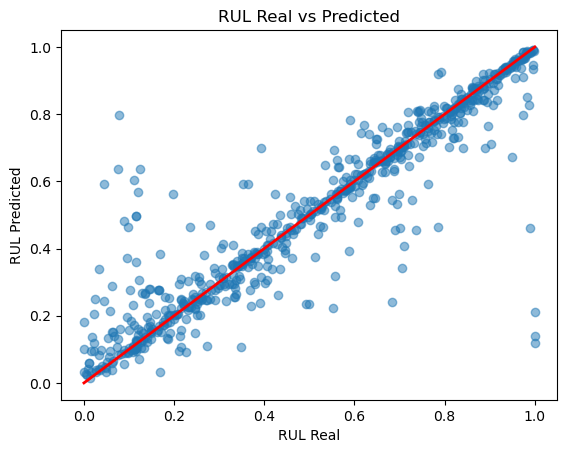

In [29]:
import matplotlib.pyplot as plt

# Dispersión real vs predicho
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("RUL Real")
plt.ylabel("RUL Predicted")
plt.title("RUL Real vs Predicted")
plt.show()


The best model

# RandomForestRegressor

Mean Squared Error (MSE): 0.005
Mean Absolute Error (MAE): 0.03
R² Score: 0.95


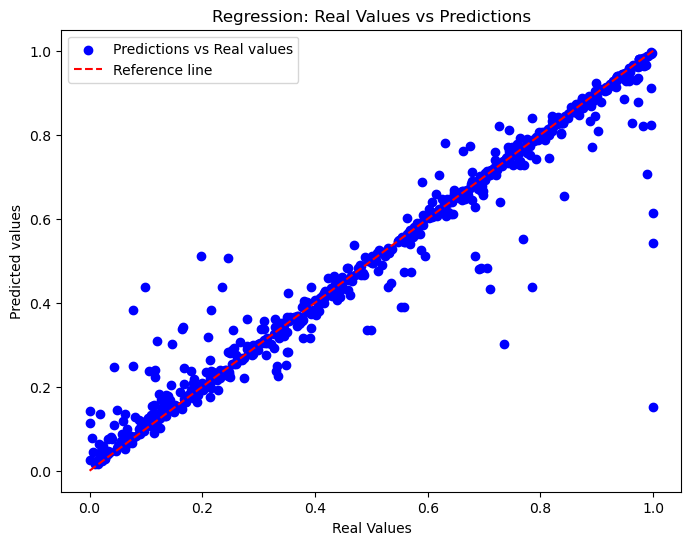

In [30]:
import torch
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)


y_pred = rf_model.predict(x_test_scaled)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label="Predictions vs Real values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Reference line")
plt.xlabel("Real Values")
plt.ylabel("Predicted values")
plt.title("Regression: Real Values ​​vs Predictions")
plt.legend()
plt.show()





In [31]:
import joblib

# Guardar el modelo entrenado
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [32]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Crear y entrenar el modelo
# rf_model = RandomForestRegressor(
#     n_estimators=300, 
#     min_samples_split=10, 
#     min_samples_leaf=4, 
#     max_depth=10, 
#     random_state=42
# )
# # rf_model.fit(x_train_pca, y_train)
# rf_model.fit(x_train_scaled, y_train)


# SVR

In [33]:
from sklearn.svm import SVR

# Entrenar el modelo
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train_scaled, y_train)

# Hacer predicciones y evaluar
y_pred_svr = svr_model.predict(x_test_scaled)


Mean Squared Error (MSE): 0.04
Mean Absolute Error (MAE): 0.15
R² Score: 0.53


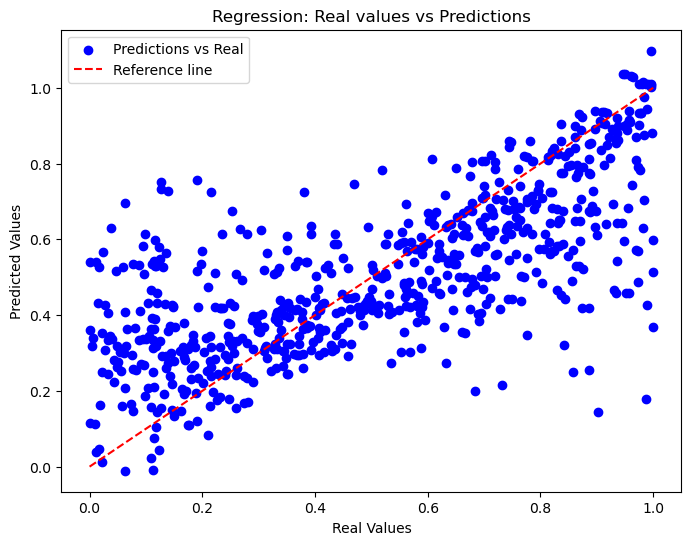

In [34]:


# y_pred = rf_model.predict(x_test_pca)
y_pred = svr_model.predict(x_test_scaled)



mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label="Predictions vs Real")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Reference line")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Regression: Real values vs Predictions")
plt.legend()
plt.show()


Epoch 10/200, Loss: 0.0528
Epoch 20/200, Loss: 0.0488
Epoch 30/200, Loss: 0.0450
Epoch 40/200, Loss: 0.0437
Epoch 50/200, Loss: 0.0417
Epoch 60/200, Loss: 0.0406
Epoch 70/200, Loss: 0.0407
Epoch 80/200, Loss: 0.0374
Epoch 90/200, Loss: 0.0368
Epoch 100/200, Loss: 0.0371
Epoch 110/200, Loss: 0.0356
Epoch 120/200, Loss: 0.0379
Epoch 130/200, Loss: 0.0359
Epoch 140/200, Loss: 0.0326
Epoch 150/200, Loss: 0.0316
Epoch 160/200, Loss: 0.0367
Epoch 170/200, Loss: 0.0356
Epoch 180/200, Loss: 0.0350
Epoch 190/200, Loss: 0.0303
Epoch 200/200, Loss: 0.0335
MSE: 0.02
MAE: 0.11
R²: 0.72


Text(0, 0.5, 'Loss')

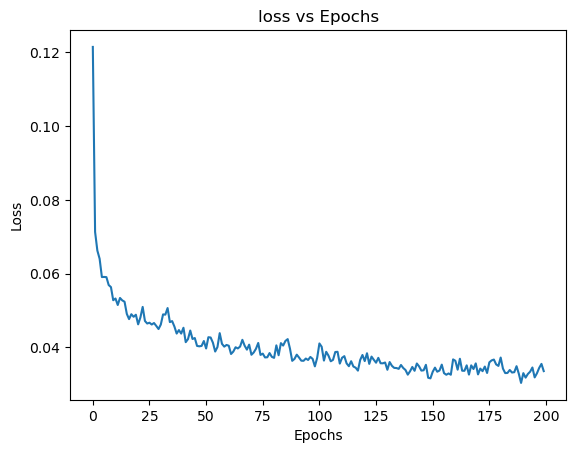

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from torch.utils.data import DataLoader, TensorDataset

# Convert los data to PyTorch tensores

X_train_tensor = torch.tensor(x_train_scaled.values, dtype=torch.float32)  
X_test_tensor = torch.tensor(x_test_scaled.values, dtype=torch.float32)    

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)    


# X_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
# X_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=254, shuffle=True)

test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=254, shuffle=False)

# DNN
class DNNModel(nn.Module):
    def __init__(self, input_size):
        super(DNNModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 1)  # output
        )

    def forward(self, x):
        return self.model(x)


input_dim = X_train_tensor.shape[1] 
model = DNNModel(input_dim)

# D (loss function) and optimizer
criterion = nn.MSELoss()  # Loss (MSE)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizer Adam

# Función para entrenar el modelo
def train_model(model, train_loader, criterion, optimizer, epochs=250):
    model.train()
    train_losses = []
    for epoch in range(epochs):
        epoch_loss = 0.0
        for data, target in train_loader:
            # Pasar los datos al modelo
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)
        if (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')
    
    return train_losses

# trining
train_losses = train_model(model, train_loader, criterion, optimizer, epochs=200)

# evaluate
def evaluate_model(model, test_loader):
    model.eval()
    y_pred = []
    y_true = []
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            y_pred.extend(output.numpy())
            y_true.extend(target.numpy())
    return y_true, y_pred

# evaluate
y_true, y_pred = evaluate_model(model, test_loader)


mse_dnn = mean_squared_error(y_true, y_pred)
mae_dnn = mean_absolute_error(y_true, y_pred)
r2_dnn = r2_score(y_true, y_pred)

print(f"MSE: {mse_dnn:.2f}")
print(f"MAE: {mae_dnn:.2f}")
print(f"R²: {r2_dnn:.2f}")
plt.plot(train_losses)
plt.title('loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.11
R² Score: 0.72


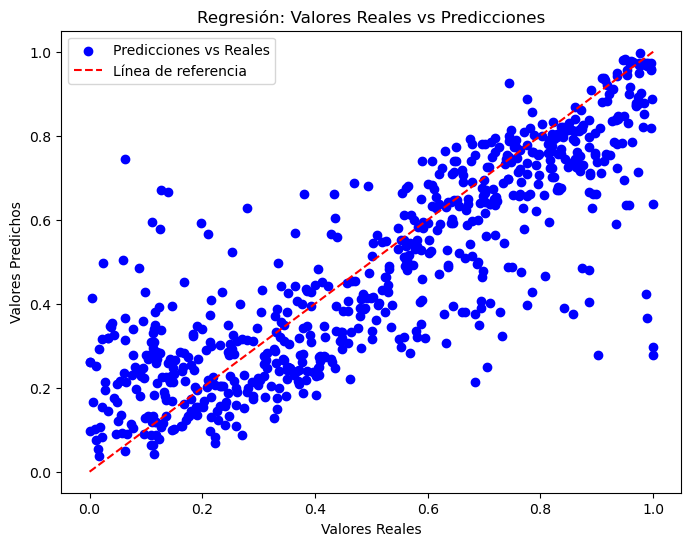

In [36]:


# y_pred = rf_model.predict(x_test_pca)
#y_pred = svr_model.predict(x_test_pca)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label="Predicciones vs Reales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Línea de referencia")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Regresión: Valores Reales vs Predicciones")
plt.legend()
plt.show()


# implementation

In [37]:
#x[205:209], 

y[800:]


800     0.215328
801     0.211679
802     0.208029
803     0.204380
804     0.200730
          ...   
6781    0.015936
6782    0.011952
6783    0.007968
6784    0.003984
6785    0.000000
Name: RUL, Length: 5986, dtype: float64

In [38]:
new_data=x[800:804]
# new_data = {
#     'type': ['-1'],
#     'ambient_temperature': [0.784018],
#     'Capacity': [0.784018],
#     'Re': [0.063757],
#     'Rct': [0.199213],
    
# }
#new_data = pd.DataFrame(new_data)

In [39]:
mms = MinMaxScaler()
mms.fit(x_train)
real_time_data_scaled = mms.transform(new_data) 

In [40]:
# with torch.no_grad():
#     real_time_data_tensor = torch.tensor(real_time_data_scaled, dtype=torch.float32)
#     predicted_rul = model(real_time_data_tensor)

# print(f"Predicted RUL: {predicted_rul.item()}")


In [41]:
# Cargar el modelo guardado
rf_model_loaded = joblib.load('random_forest_model.pkl')

# Hacer predicciones con el modelo cargado
y_pred_real_time = rf_model_loaded.predict(real_time_data_scaled)
y_pred_real_time

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.38321429, 0.25875637, 0.26233726, 0.22751082])